Installing the necessary libs

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('glassdoor_gender_pay_gap.csv')
data['Total Pay']=data['BasePay']+data['Bonus']
data.drop(['BasePay','Bonus'],axis=1,inplace=True)
data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,Total Pay
0,Graphic Designer,Female,18,5,College,Operations,2,52301
1,Software Engineer,Male,21,5,College,Management,5,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,108783


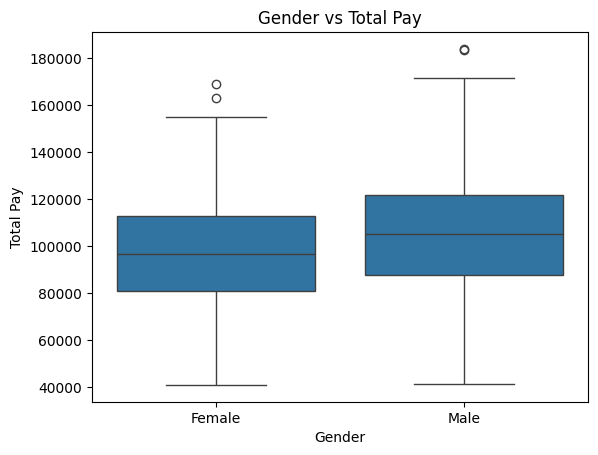

In [ ]:
sns.boxplot(x=data['Gender'],y=data['Total Pay'])
plt.title('Gender vs Total Pay')
plt.show()

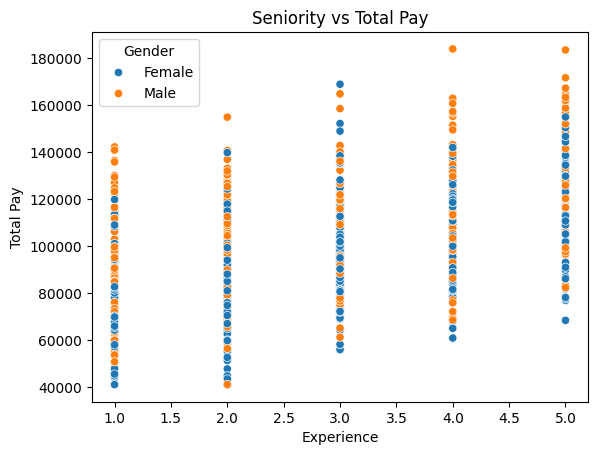

In [ ]:
sns.scatterplot(y=data['Total Pay'],x=data['Seniority'],hue=data['Gender'],data=data)
plt.xlabel('Experience')
plt.ylabel('Total Pay')
plt.title('Seniority vs Total Pay')
plt.show()

In [ ]:
# Calculating the correlation matrix for the features

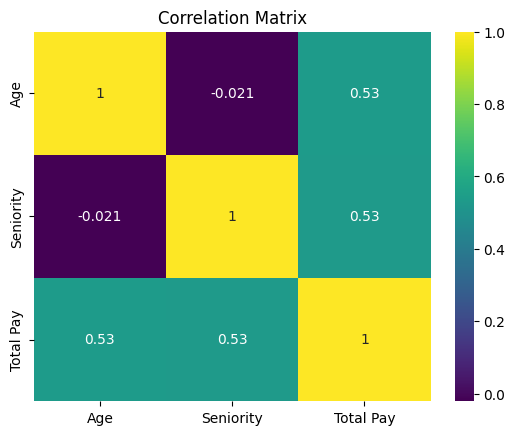

In [ ]:
from seaborn import heatmap
corr=data[['Age','Seniority','Total Pay']].corr()
heatmap(corr,annot=True,cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# avg_female_pay=data[data['Gender']=='Female']['Total Pay'].mean()
# avg_male_pay=data[data['Gender']=='Male']['Total Pay'].mean()
# avg_count_female=data[data['Gender']=='Female'].count()['Gender']
# avg_count_male=data[data['Gender']=='Male'].count()['Gender']
# df_job_roles=data['JobTitle'].drop_duplicates().head()
# print(df_job_roles)
# Total_count=data.count()['Gender']
# print(Total_count)
# print(avg_count_male)
# print(avg_count_female)
# print(avg_female_pay,avg_male_pay)
# data_femlae=data.groupby(['Gender','JobTitle'])['Total Pay'].mean().reset_index()
# print(data_femlae)
avg_salary=data.groupby(data['Gender']=='Female')['Total Pay'].mean().reset_index()
print(avg_salary)

   Gender      Total Pay
0   False  104918.678571
1    True   96416.831197


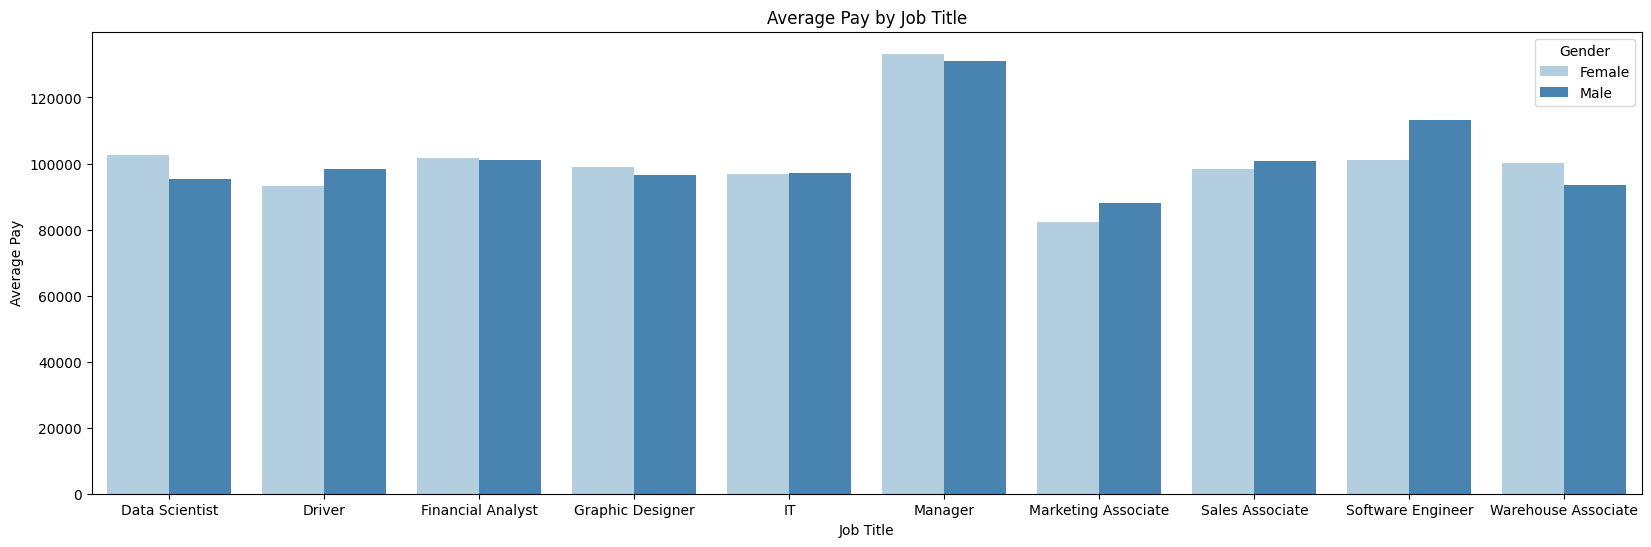

In [ ]:

avg_pay_byrole=data.groupby(['JobTitle','Gender'])['Total Pay'].mean().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='JobTitle',y='Total Pay',hue='Gender',data=avg_pay_byrole,palette='Blues')
plt.title('Average Pay by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Pay')
plt.show()

In [ ]:
pivot = avg_pay_byrole.pivot(index='JobTitle', columns='Gender', values='Total Pay')
pivot['Pay_Gap_%'] = ((pivot['Male'] - pivot['Female']) / pivot['Female']) * 100
print(pivot)

Gender                      Female           Male  Pay_Gap_%
JobTitle                                                    
Data Scientist       102452.264151   95450.000000  -6.834660
Driver                93197.347826   98417.800000   5.601503
Financial Analyst    101743.653061  101116.362069  -0.616541
Graphic Designer      98810.416667   96584.080000  -2.253140
IT                    96837.940000   97239.586957   0.414762
Manager              133244.277778  130929.152778  -1.737504
Marketing Associate   82251.149533   88161.636364   7.185902
Sales Associate       98220.534884  100893.549020   2.721441
Software Engineer    101147.375000  113033.811881  11.751602
Warehouse Associate  100083.934783   93363.613636  -6.714685


In [ ]:
# overall pay gap of an organization

avg_pay_f=data[data['Gender']=='Female']['Total Pay'].mean()
avg_pay_m=data[data['Gender']=='Male']['Total Pay'].mean()
pay_gap_org=((avg_pay_f-avg_pay_m)/avg_pay_f)*100
print(pay_gap_org)

-8.817804183496984


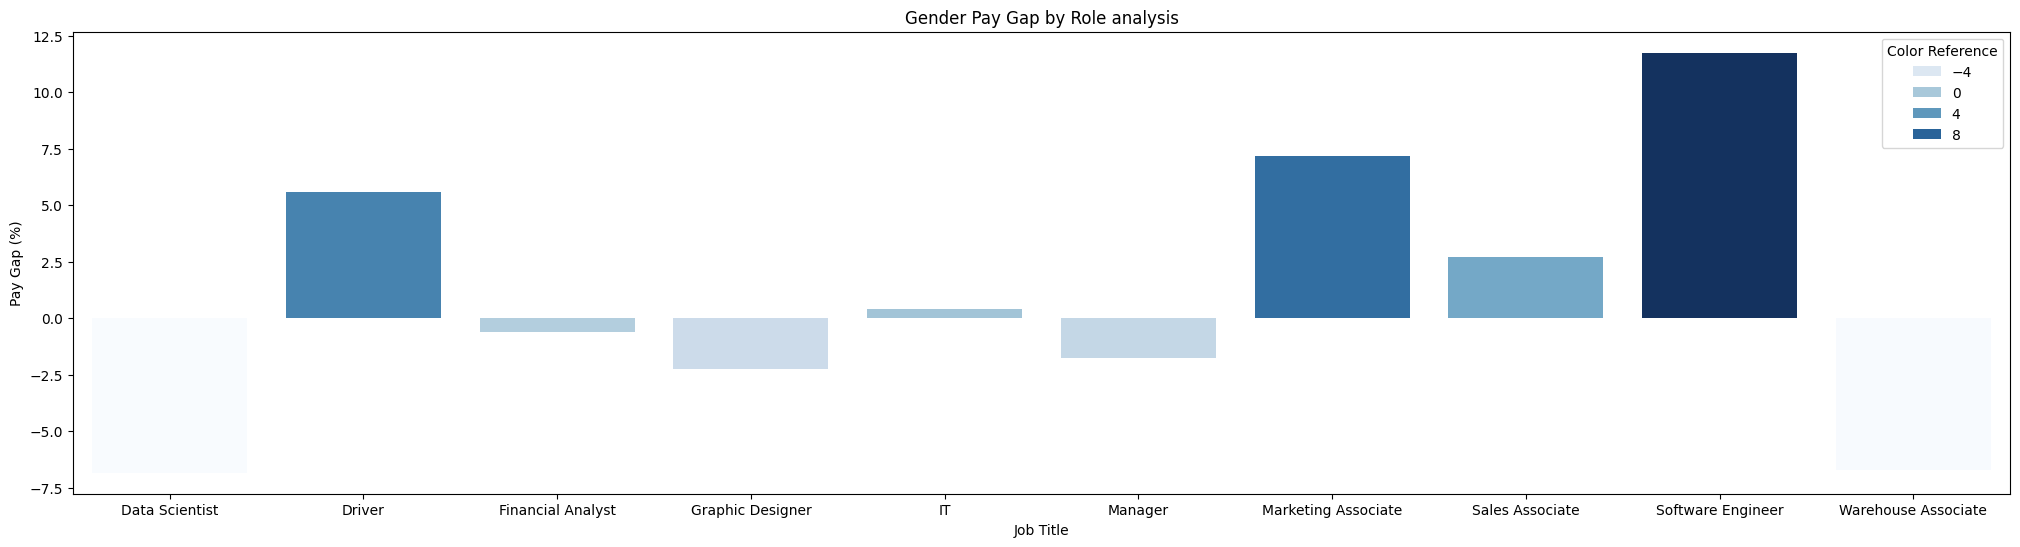

In [ ]:
plt.figure(figsize=(25,6))
sns.barplot(x='JobTitle',y='Pay_Gap_%',data=pivot.reset_index(),hue='Pay_Gap_%',palette='Blues')
plt.title('Gender Pay Gap by Role analysis')
plt.legend(title='Color Reference')
plt.xlabel('Job Title')
plt.ylabel('Pay Gap (%)')
plt.show()

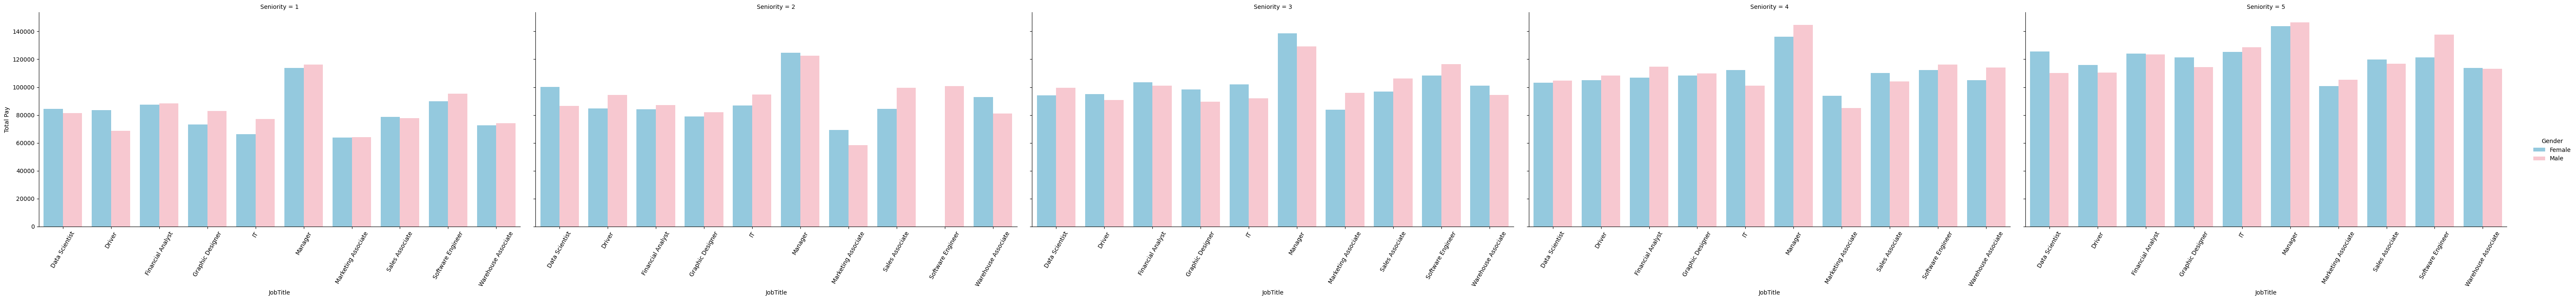

In [ ]:
avg_pay_by_role_and_gender=data.groupby(['JobTitle','Gender','Seniority'])['Total Pay'].mean().reset_index()
g = sns.FacetGrid(avg_pay_by_role_and_gender, col="Seniority", height=6, aspect=2)
g.map_dataframe(sns.barplot, x='JobTitle', y='Total Pay', hue='Gender', palette=['skyblue','pink'])
g.set_xticklabels(rotation=60)
g.add_legend(title='Gender')
plt.show()


In [ ]:
avg_pay_role=data.groupby(['JobTitle','Dept','Seniority','Gender'])['Total Pay'].mean().reset_index()
pay_gap=avg_pay_role['']
print(pay_gap)

0      Administration
1      Administration
2      Administration
3      Administration
4      Administration
            ...      
405             Sales
406             Sales
407             Sales
408             Sales
409             Sales
Name: Dept, Length: 410, dtype: object


In [ ]:
#There are no missing values for this data

In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

one_hot_encoder_cols=['Dept','JobTitle']
ordinal_encoder_cols=['Gender','Education', 'PerfEval']
standard_scaler_cols=['Age','Seniority']

cols=ColumnTransformer(
    [
        ('one_hot_encoder',OneHotEncoder(),one_hot_encoder_cols),
        ('ordinal_encoder',OrdinalEncoder(),ordinal_encoder_cols),
        ('standard_scaler',StandardScaler(),standard_scaler_cols)
    ],remainder='passthrough'
)
X = data.drop(columns=['Total Pay'])  # Features
y = data['Total Pay']                 # Target
data_transformed = cols.fit_transform(X)

In [ ]:
# training the model
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(data_transformed, y, test_size=0.3, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score=r2_score(y_test,y_pred)
print(f'R-squared: {accuracy_score}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

y_pred_positive = np.maximum(y_pred, 0)
accuracy_pred=root_mean_squared_log_error(y_test,y_pred)
print(f'RMSLE: {accuracy_pred}')

# Display the first few predicted values
print("First 10 predicted values:")
display(y_pred[:10])



R-squared: 0.8626384893695678
RMSE: 9433.155030737993
RMSLE: 0.10530332633409788
First 10 predicted values:


array([108762.47942013, 159505.7918749 , 120208.19880415, 122072.38387412,
       126834.35156263, 102877.74128347,  87968.82719571, 101860.26096273,
        81329.11231551, 105753.24354155])

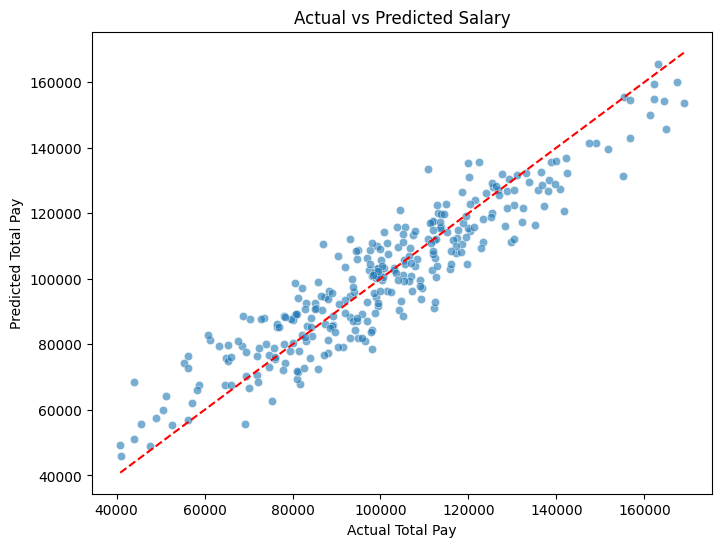

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Total Pay")
plt.ylabel("Predicted Total Pay")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


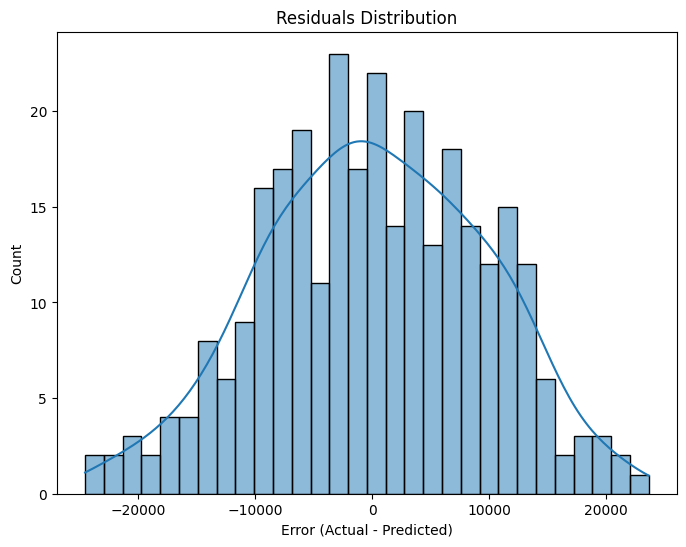

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.show()



In [ ]:
# Create a DataFrame to store actual and predicted values along with original features
# Need to use the original X_test to get the Gender column


results = pd.DataFrame({
    'Gender': data.loc[y_test.index, 'Gender'],
    'Actual': y_test,
    'Predicted': y_pred
})

# Group by gender and calculate the mean of actual and predicted total pay
bias_check = results.groupby('Gender')[['Actual', 'Predicted']].mean()
print(bias_check)




               Actual      Predicted
Gender                              
Female   95862.654930   97194.022198
Male    105129.183544  103661.709401


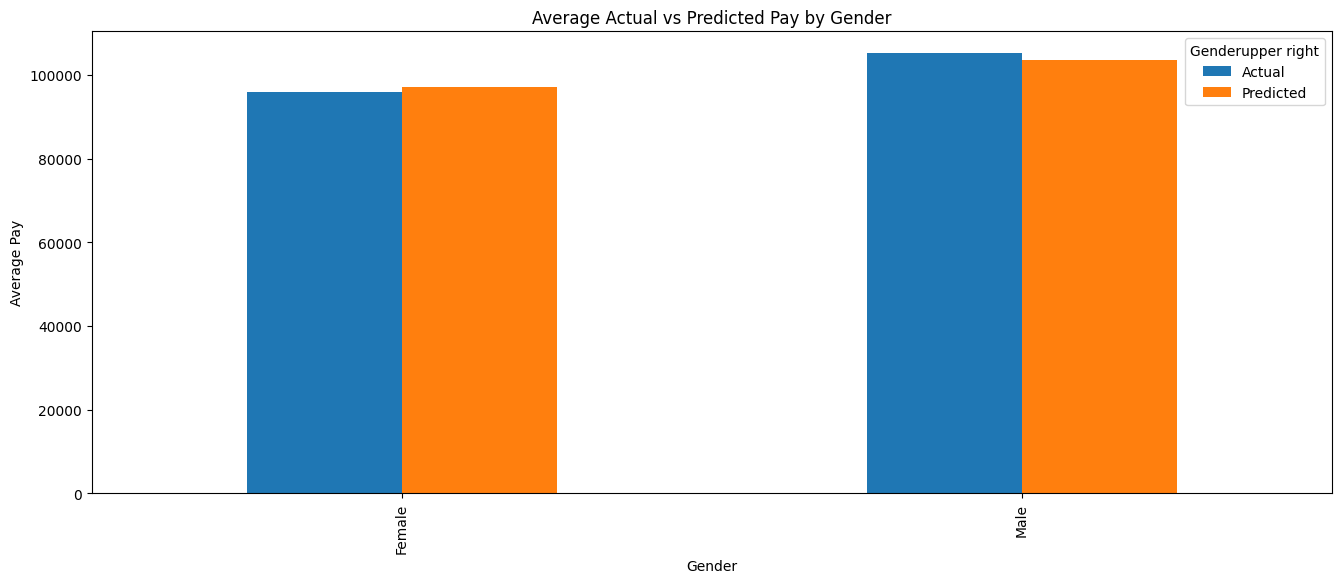

In [ ]:
bias_check.plot(kind='bar', figsize=(16,6))
plt.title("Average Actual vs Predicted Pay by Gender")
plt.ylabel("Average Pay")
plt.legend(title='Gender''upper right')
